# Non-parametric machine learning models knn, decision trees, and random forests
Name: Rusheel Chande

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## 1. Data Exploration & kNN

### 1.1 Load the data

1.

(a) the number of rows and columns

In [2]:
skin = pd.read_csv("../data/skin-nonskin.csv", sep="\t")
skin.shape

(245057, 4)

There are 4 columns and 245,057 rows

(b) print a few lines of data

In [3]:
skin.sample(8)

,B,G,R,Label
118769,80,83,34,2
159652,138,136,82,2
88258,170,168,120,2
133572,107,107,91,2
4086,117,156,211,1
188455,162,164,122,2
59409,176,176,130,2
202904,161,158,113,2


(c) does it contain any missing values?

In [4]:
skin.isna().sum()

B        0
G        0
R        0
Label    0
dtype: int64

Thankfully, there are no missing values.

(d) what are maximum and minimum values for R, G, B?

In [5]:
print("Maximum values (R G B): ", skin.R.max(), skin.G.max(), skin.B.max())
print("Minimum values (R G B): ", skin.R.min(), skin.G.min(), skin.B.min())

Maximum values (R G B):  255 255 255
Minimum values (R G B):  0 0 0


The maximum value for all R, G, and B is 255 and the minimum value for all of them is 0

(e) what are the possible labels?

In [6]:
skin.Label.unique()

array([1, 2], dtype=int64)

The possible values for "Label" is either 1 or 2. 1 means it's skin and 2 means it isn't.

2.

(a) What is the dimensionality of the feature space?

This feature space is 3 dimentional. It is 3 because 3 is the number of independent features that affect the dependent feature/variable

(b) In this feature space, does the class of feasible skin tones have a linear or non-linear boundary?

Yes, the boundary is non linear, because the color of skin tones vary from person to person. Some may be darker, while others lighter.

(c) Given the R,G,B values, is there any uncertainty if the given tone is a possible skin tone?

Yes, there is a degree of uncertainty because there may be some exceptional cases when one's skin tone is an outlier. For example, some people may have a pigmentation condition which causes the skin to become extremely light. This can cause uncertainty in a model. However, some complex models may be able to minimize this potential trigger of uncertainty.

3. What is the accuracy of a naive classifier that categorizes all samples as the majority class?

In [7]:
label_count = skin.Label.value_counts()
label_count

2    194198
1     50859
Name: Label, dtype: int64

In [8]:
skin.Label.count()

245057

In [9]:
naive_accuracy = 194198 / 245057
naive_accuracy

0.7924605295910747

The accuracy of a naive classifier is about 0.79. And the majority class is 2 which is "not skin" essentially

4. (1pt) Create the feature space X (the R, G, B values) and the target variable y (the labels). Split both X and
y into training and validation sets (80% for training, 20% for testing).

In [10]:
x_data = skin[["R", "G", "B"]]
y_data = skin["Label"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=371)

### 1.2 knn

1. Compute accuracy on both training and validation data by using knn

In [11]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
train_predict = knn_model.predict(x_train)
test_predict = knn_model.predict(x_test)
train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

train_acc, test_acc

(0.9996378382514218, 0.9995103240022851)

The training accuracy is 0.9996 and the test accuracy is 0.9995

2. How well does knn perform compared to the naive model above and why?

This model is so much more better because it is more complex rather that simply taking a proportion of the majority class. kNN takes into account the nearest data points to make a decision (based on distance). Another concern is overfitting since the accuracy is so high. But this doesn't seem to be the case since the test accuracy is just as high. 

## 2. Decision Trees

In [12]:
loan = pd.read_csv("../data/loan_approval_dataset.csv")
loan = loan.drop("loan_id", axis=1)
loan.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [13]:
var0 = {"education": {"Graduate":0, "NotGraduate":1}}
loan = loan.replace(var0)

var1 = {"self_employed": {"Yes":0, "No":1}}
loan = loan.replace(var1)

var2 = {"loan_status": {"Approved":0, "Rejected":1}}
loan = loan.replace(var2)

loan

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,0,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [14]:
x_data = loan[["no_of_dependents", "education", "self_employed", "income_annum", "loan_amount", "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]]
y_data = loan["loan_status"]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=371)

### 2.1 Maximum depth in decision tress

1. What kind of decision boundary do you expect to see based on trees?

I expect to see a segment type of boundary that categorize cases/individuals into either approved or rejected based on splits in the features

2. Explain what the maximum depth parameter does. Do large or small values for maximum depth cause
overfitting?

The maximum depth parameter sets the maximum amount of splits a decision tree can have. Large values can cause over fitting and memorization, because it becomes to complex, capturing noise from training. Too small of a depth can oppositely cause underfitting.

3. Run a series of decision tree models of different maximum depth in a loop. Start with a small depth,
and increase it into the overfitting territory so that the model starts overfitting. At each iteration, store both
validation and training accuracy.
Make a plot where you show how both training and validation accuracy depend on maximum depth. Try to
make the graph so that the differences are easily visible.

In [15]:
results_list = []
for depth in range(1, 101, 5):
    clf_dt = make_pipeline(tree.DecisionTreeClassifier(max_depth=depth))
    clf_dt.fit(x_train, y_train)
    
    train_predict = clf_dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_predict)
    test_predict = clf_dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_predict)
    
    results_list.append([depth, train_accuracy, test_accuracy])
    
df_results_list_dt = pd.DataFrame(results_list, columns=["depth", "train_accuracy", "test_accuracy"])
df_results_list_dt

,depth,train_accuracy,test_accuracy
0,1,0.952269,0.959016
1,6,0.978917,0.971897
2,11,0.995608,0.982436
3,16,1.000000,0.983607
4,21,1.000000,0.984778
5,26,1.000000,0.983607
6,31,1.000000,0.983607
7,36,1.000000,0.987119
8,41,1.000000,0.982436
9,46,1.000000,0.982436


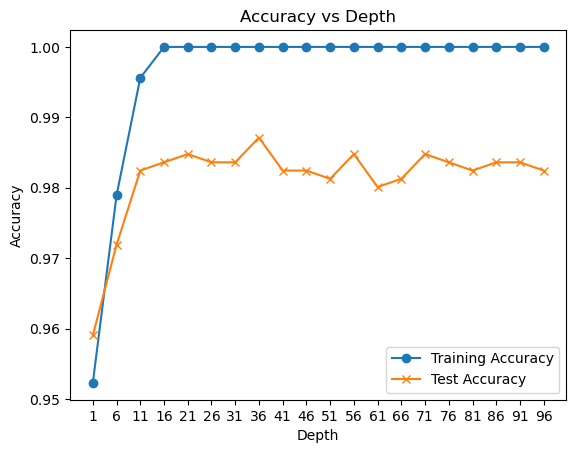

In [16]:
fig, ax = plt.subplots()
ax.plot(df_results_list_dt.depth, df_results_list_dt.train_accuracy, label="Training Accuracy", marker="o")
ax.plot(df_results_list_dt.depth, df_results_list_dt.test_accuracy, label="Test Accuracy", marker="x")

ax.set_title("Accuracy vs Depth")
ax.set_xlabel("Depth")
ax.set_ylabel("Accuracy")
ax.set_xticks(list(range(1, 100, 5)))
ax.legend()

plt.show()

4. What is the best validation accuracy that you get? What is the corresponding maximum depth?

In [17]:
df_results_list_dt.test_accuracy.idxmax()

7

In [19]:
df_results_list_dt.iloc[7]

depth             36.000000
train_accuracy     1.000000
test_accuracy      0.987119
Name: 7, dtype: float64

The best test accuracy is about 0.987119 with a corresponding maximum depth of 36.

5. Discuss your findings: where does the model start overfitting? What is the optimal depth?

For this particular data set, I don't see the test accuracy score dropping at anytime. However, since the test accuracy does significantly drop, I would say max_depth past 26 is unnecessary and could be overfitting.

### 2.2 Minimum sample size to split

1. Explain what the min_sample_split parameter does. Do large or small values lead to overfitting?

min_sample_split sets the minimum number of values required for a decision tree to split. Smaller values can lead to overfitting, while larger values can lead to underfitting.

2. Run a series of decision tree models with different min_sample_split values in a loop. Try to cover
both underfitting and overfitting. Each time store both validation and training accuracy. Make a plot where
you show how both training and validation accuracy depend on the parameter.

In [21]:
results_list = []
for samples in range(5, 50, 5):
    clf_dt = tree.DecisionTreeClassifier(min_samples_split=samples)
    clf_dt.fit(x_train, y_train)
    
    train_predict = clf_dt.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_predict)
    test_predict = clf_dt.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_predict)
    
    results_list.append([samples, train_accuracy, test_accuracy])

df_results_list_dt = pd.DataFrame(results_list, columns=["min_samples_split", "train_accuracy", "test_accuracy"])

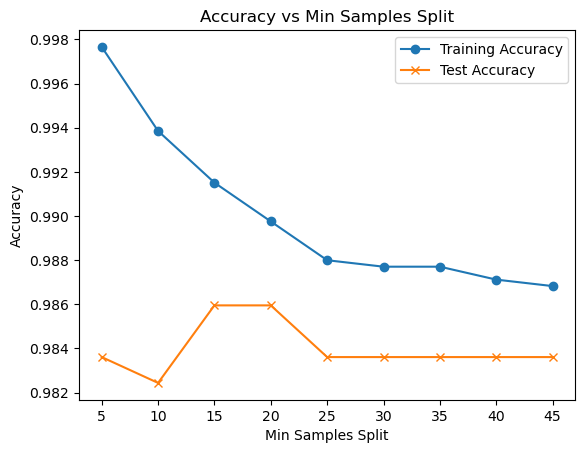

In [22]:
fig, ax = plt.subplots()

ax.plot(df_results_list_dt.min_samples_split, df_results_list_dt.train_accuracy, label="Training Accuracy", marker="o")
ax.plot(df_results_list_dt.min_samples_split, df_results_list_dt.test_accuracy, label="Test Accuracy", marker="x")

ax.set_title("Accuracy vs Min Samples Split")
ax.set_xlabel("Min Samples Split")
ax.set_ylabel("Accuracy")
ax.set_xticks(df_results_list_dt.min_samples_split)
ax.legend()

plt.show()

3. What is the best validation accuracy you get? What is the corresponding min_sample_split?

In [23]:
df_results_list_dt.test_accuracy.idxmax()

2

In [24]:
df_results_list_dt.iloc[2]

min_samples_split    15.000000
train_accuracy        0.991508
test_accuracy         0.985948
Name: 2, dtype: float64

The best validation accuracy I get is 0.985948 with a min_samples_split of 15

4. Discuss your findings: where does the model start overfitting?

The model starts overfitting after 20+ minimum samples split. This is because we see a drop in the accuracy of tests.

5. Write a double loop over both parameters. Try to pick a number of values not too different from what you found above when analyzing those individually. Store the best result and the respective parameters.


In [25]:
best_result = {"max_depth": None, "min_samples_split": None, "accuracy": 0}

depth_values = range(1, 101, 5)
min_samples_values = range(5, 50, 5)

for depth in depth_values:
    for min_samples in min_samples_values:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        model.fit(x_train, y_train)
        
        predictions = model.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)

        if accuracy > best_result["accuracy"]:
            best_result["max_depth"] = depth
            best_result["min_samples_split"] = min_samples
            best_result["accuracy"] = accuracy

print("Best parameters: max_depth={}, min_samples_split={}, accuracy={}".format(
    best_result["max_depth"],
    best_result["min_samples_split"],
    best_result["accuracy"]
))

Best parameters: max_depth=11, min_samples_split=5, accuracy=0.9859484777517564


## 3 Random forests

1. Explain what the n_estimators parameter does.

The n_estimators parameter is the number of decision trees that will be used in the algorithm and play a role in the average or regular vote.

2. Run a series of random forest classifiers testing what is the best number of estimators. This may be
slow, so you may want to skip quite a few potential values.

In [26]:
results_list = []

for n_estimators in range(10, 201, 20):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, y_train)
    
    train_preds = rf.predict(x_train)
    test_preds = rf.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    results_list.append([n_estimators, train_accuracy, test_accuracy])

df_results = pd.DataFrame(results_list, columns=["n_estimators", "train_accuracy", "test_accuracy"])
df_results

,n_estimators,train_accuracy,test_accuracy
0,10,0.998829,0.985948
1,30,0.999707,0.985948
2,50,1.000000,0.985948
3,70,1.000000,0.985948
4,90,1.000000,0.985948
5,110,1.000000,0.985948
6,130,1.000000,0.985948
7,150,1.000000,0.985948
8,170,1.000000,0.984778
9,190,1.000000,0.984778


3. Make a plot where you show how both training and validation accuracy depend on the parameter. What
is the best validation accuracy you get?

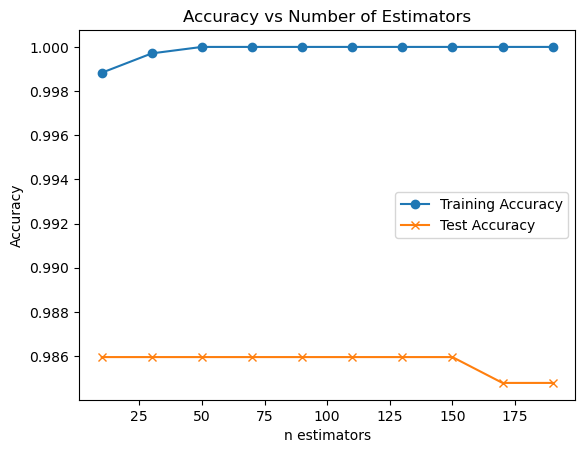

In [27]:
fig, ax = plt.subplots()
ax.plot(df_results.n_estimators, df_results.train_accuracy, label="Training Accuracy", marker="o")
ax.plot(df_results.n_estimators, df_results.test_accuracy, label="Test Accuracy", marker="x")

ax.set_title("Accuracy vs Number of Estimators")
ax.set_xlabel("n estimators")
ax.set_ylabel("Accuracy")
ax.legend()
plt.show()

In [28]:
df_results.test_accuracy.idxmax()

0

In [29]:
df_results_list_dt.iloc[0]

min_samples_split    5.000000
train_accuracy       0.997657
test_accuracy        0.983607
Name: 0, dtype: float64

The best validation accuracy I get is 0.982436

4. Where does the model start overfitting, please explain?

I don't think a high number of n_estimators causes overfitting. Instead the more n_estimators, the better in most cases. However, when n-estimators reaches a certain number it stops having an impact. I would say in this case that number is 150 n_estimators